In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt


In [2]:
data = pd.read_excel('Online Retail.xlsx')


In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
pd.DataFrame(
    {
        "unique_values": data.nunique(axis=0),
        "number_missing_values": data.isna().sum(),
        "percentage_missing_values": data.isna().sum()
        / data.shape[0]
        * 100,
        "data_type": data.dtypes,
    }
)

,unique_values,number_missing_values,percentage_missing_values,data_type
InvoiceNo,25900,0,0.000000,object
StockCode,4070,0,0.000000,object
Description,4223,1454,0.268311,object
Quantity,722,0,0.000000,int64
InvoiceDate,23260,0,0.000000,datetime64[ns]
UnitPrice,1630,0,0.000000,float64
CustomerID,4372,135080,24.926694,float64
Country,38,0,0.000000,object


In [5]:
data["monetary"] = data["Quantity"] * data["UnitPrice"]


In [6]:
data.dropna(inplace=True)


In [7]:
data = data[~data["InvoiceNo"].str.contains("C", na=False)]

In [8]:
today_date = datetime.datetime(2011, 12, 10)


In [9]:
rfm = data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'InvoiceNo': lambda num: num.nunique(),
                                     'monetary': lambda TotalPrice: TotalPrice.sum()})

In [10]:
rfm.columns = ['recency', 'frequency', 'monetary']

In [11]:
rfm

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,2,178.05


In [12]:
col = ['recency', 'frequency', 'monetary']
Q1 = rfm[col].quantile(0.25)
Q3 = rfm[col].quantile(0.75)
IQR = Q3 - Q1

#used_car_data = rfm[~((rfm[col] < (Q1 - 1.5 * IQR)) |(rfm[col] > (Q3 + 1.5 * IQR))).any(axis=1)]
rfm = rfm[~((rfm[col] < (Q1 - 1.5 * IQR)) |(rfm[col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
rfm

,recency,frequency,monetary
CustomerID,,,
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40
12352.0,36,8,2506.04
12353.0,204,1,89.00
...,...,...,...
18278.0,73,1,173.90
18280.0,277,1,180.60
18281.0,180,1,80.82


In [14]:
import math

In [15]:
rfm['cube_recency']=np.power((rfm['recency']),1/3)
rfm['cube_frequency']=np.power((rfm['frequency']),1/3)
rfm['cube_monetary']=np.power((rfm['monetary']),1/3)

<ipython-input-15-a2c9e133974e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['cube_recency']=np.power((rfm['recency']),1/3)
<ipython-input-15-a2c9e133974e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['cube_frequency']=np.power((rfm['frequency']),1/3)
<ipython-input-15-a2c9e133974e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [16]:
rfm[['cube_recency', 'cube_frequency', 'cube_monetary']] = (rfm[['cube_recency', 'cube_frequency', 'cube_monetary']] - np.mean(rfm[['cube_recency', 'cube_frequency', 'cube_monetary']], axis=0)) / np.std(rfm[['cube_recency', 'cube_frequency', 'cube_monetary']], axis=0)

<ipython-input-16-b9e855dca02a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm[['cube_recency', 'cube_frequency', 'cube_monetary']] = (rfm[['cube_recency', 'cube_frequency', 'cube_monetary']] - np.mean(rfm[['cube_recency', 'cube_frequency', 'cube_monetary']], axis=0)) / np.std(rfm[['cube_recency', 'cube_frequency', 'cube_monetary']], axis=0)


In [17]:
rfm

,recency,frequency,monetary,cube_recency,cube_frequency,cube_monetary
CustomerID,,,,,,
12348.0,75,4,1797.24,0.184618,0.768731,1.211635
12349.0,18,1,1757.55,-0.842931,-1.023238,1.179486
12350.0,310,1,334.40,1.826418,-1.023238,-0.648568
12352.0,36,8,2506.04,-0.404481,2.027436,1.719662
12353.0,204,1,89.00,1.259270,-1.023238,-1.531486
...,...,...,...,...,...,...
18278.0,73,1,173.90,0.160272,-1.023238,-1.133231
18280.0,277,1,180.60,1.666009,-1.023238,-1.107994
18281.0,180,1,80.82,1.104438,-1.023238,-1.581832


In [18]:
rfm.to_csv('rfm.csv')

In [19]:
rfm = pd.read_csv('rfm.csv')

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0,n_init = 5,tol = 0.1)
rfm['cluster'] = kmeans.fit_predict(rfm[['cube_recency', 'cube_frequency', 'cube_monetary']])

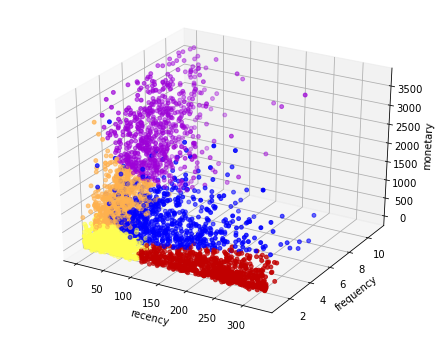

In [21]:
from mpl_toolkits.mplot3d import Axes3D
colors =["#ffff52","#ffb14e","#c10000","#9d02d7","#0000ff"]
#matplotlib widget
#rfm['cluster'] = kmeans.fit_predict(rfm[['recency', 'frequency', 'monetary']])
rfm['c'] = rfm.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(rfm.recency, rfm.frequency, rfm.monetary, c=rfm.c, s=15)
ax.set_xlabel('recency')
ax.set_ylabel('frequency')
ax.set_zlabel('monetary')
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
Agg = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
rfm['Aggcluster'] = Agg.fit_predict(rfm[['cube_recency', 'cube_frequency', 'cube_monetary']])


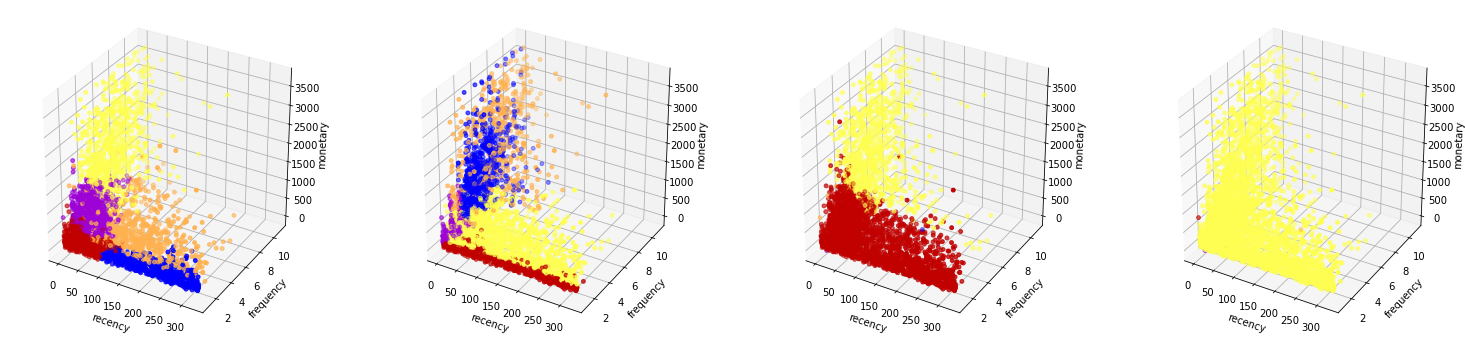

In [23]:
from mpl_toolkits.mplot3d import Axes3D
colors =["#ffff52","#ffb14e","#c10000","#9d02d7","#0000ff"]
#matplotlib widget
rfm['Aggc'] = rfm.Aggcluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})
complete = pd.Series(AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete').fit_predict(rfm[['cube_recency', 'cube_frequency', 'cube_monetary']])).map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})
average = pd.Series(AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average').fit_predict(rfm[['cube_recency', 'cube_frequency', 'cube_monetary']])).map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})
single = pd.Series(AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single').fit_predict(rfm[['cube_recency', 'cube_frequency', 'cube_monetary']])).map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.scatter(rfm.recency, rfm.frequency, rfm.monetary, c=rfm.Aggc, s=15)
ax.set_xlabel('recency')
ax.set_ylabel('frequency')
ax.set_zlabel('monetary')

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.scatter(rfm.recency, rfm.frequency, rfm.monetary, c=complete, s=15)
ax.set_xlabel('recency')
ax.set_ylabel('frequency')
ax.set_zlabel('monetary')

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.scatter(rfm.recency, rfm.frequency, rfm.monetary, c=average, s=15)
ax.set_xlabel('recency')
ax.set_ylabel('frequency')
ax.set_zlabel('monetary')

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.scatter(rfm.recency, rfm.frequency, rfm.monetary, c=single, s=15)
ax.set_xlabel('recency')
ax.set_ylabel('frequency')
ax.set_zlabel('monetary')

plt.show()

Find the ratio of each cluster 

In [24]:
rfm['cluster'].value_counts()/len(rfm['cluster'])

0    0.224198
2    0.206683
4    0.199407
1    0.185664
3    0.184047
Name: cluster, dtype: float64

In [25]:
rfm['Aggcluster'].value_counts()/len(rfm['Aggcluster'])

0    0.247103
2    0.208030
3    0.205874
4    0.170843
1    0.168149
Name: Aggcluster, dtype: float64

In [26]:
rfm.groupby('cluster')[['recency', 'frequency', 'monetary']].max()

,recency,frequency,monetary
cluster,,,
0,99,4,1013.01
1,60,7,3192.54
2,326,3,1063.00
3,264,11,3692.28
4,319,7,3528.34


In [27]:
rfm.groupby('cluster')[['recency', 'frequency', 'monetary']].min()

,recency,frequency,monetary
cluster,,,
0,1,1,0.00
1,0,1,201.12
2,101,1,3.75
3,0,2,694.40
4,30,1,70.02


In [28]:
rfm.groupby('cluster')[['recency', 'frequency', 'monetary']].median()

,recency,frequency,monetary
cluster,,,
0,38.0,1.0,277.425
1,18.0,3.0,853.720
2,233.0,1.0,237.610
3,24.0,6.0,2124.990
4,106.0,2.0,801.500


In [29]:
rfm.groupby('Aggcluster')[['recency', 'frequency', 'monetary']].max()

,recency,frequency,monetary
Aggcluster,,,
0,264,11,3692.280
1,326,9,3251.071
2,124,4,1201.490
3,123,7,2199.310
4,326,1,1063.000


In [30]:
rfm.groupby('Aggcluster')[['recency', 'frequency', 'monetary']].min()

,recency,frequency,monetary
Aggcluster,,,
0,0,1,725.07
1,18,1,52.00
2,1,1,0.00
3,0,1,173.74
4,92,1,3.75


In [31]:
rfm.groupby('Aggcluster')[['recency', 'frequency', 'monetary']].median()

,recency,frequency,monetary
Aggcluster,,,
0,23.0,5.0,1883.810
1,155.0,2.0,632.170
2,37.0,1.0,260.210
3,29.0,3.0,726.930
4,235.0,1.0,215.375


evaluate the model

In [32]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import euclidean_distances
from math import ceil
import time

In [33]:
def betacv(data, labels, metric='euclidean'):
    distances = pairwise_distances(data, metric=metric)
    n = labels.shape[0]
    A = np.array([intra_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    B = np.array([inter_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    a = np.sum(A)
    b = np.sum(B)
    labels_unq = np.unique(labels)
    members = np.array([member_count(labels, i) for i in labels_unq])
    N_in = np.array([i*(i-1) for i in members])
    n_in = np.sum(N_in)
    N_out = np.array([i*(n-i) for i in members])
    n_out = np.sum(N_out)
    betacv = (a/n_in)/(b/n_out)
    #print('intra:', a)
    #print('inter:', b)
    #print('n_in :', n_in)
    #print('n_out:', n_out)
    return betacv
def intra_cluster_distance(distances_row, labels, i):
    mask = labels == labels[i]
    mask[i] = False
    if not np.any(mask):
        # cluster of size 1
        return 0
    a = np.sum(distances_row[mask])
    return a

def inter_cluster_distance(distances_row, labels, i):
    mask = labels != labels[i]
    b = np.sum(distances_row[mask])
    return b

def member_count(labels, i):
    mask = labels == i
    return len(labels[mask])

In [34]:
kmeans5ClustersScore = betacv(rfm[['recency', 'frequency', 'monetary']],rfm['cluster'] )
kmeans5ClustersScore

0.41257202000931176

In [35]:
Agg5ClustersScore = betacv(rfm[['recency', 'frequency', 'monetary']],rfm['Aggcluster'] )
Agg5ClustersScore

0.46887696223227054